## Exercise - DL Tutorial 06

### student names:

Submit you solution by 02 June to manuel.milling@informatik.uni-augsburg.de OR maurice.gerczuk@informatik.uni-augsburg.de

In [685]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import numpy as np

tf.get_logger().setLevel('ERROR')

Load MNIST data like in tutorial 3.

In [686]:
from tensorflow.keras.datasets import mnist
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print('x_train shape:\t', x_train.shape)
print('y_train shape:\t', y_train.shape)
print('x_test shape:\t', x_test.shape)
print('y_test shape:\t', y_test.shape)

x_train shape:	 (60000, 784)
y_train shape:	 (60000,)
x_test shape:	 (10000, 784)
y_test shape:	 (10000,)


Create one-hot target labels for the TensorFlow model.

In [687]:
one_hot_y_train = tf.keras.utils.to_categorical(y_train, num_classes)
one_hot_y_test = tf.keras.utils.to_categorical(y_test, num_classes)

### 2. Implement model with Sequential API

Define model.

In [688]:
keras_model = Sequential([
    Dense(400, input_shape=(784,)),
    Activation('sigmoid'),
    Dense(400),
    Activation('sigmoid'),
    Dense(10),
    Activation('softmax')
])
keras_model.summary()

Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_465 (Dense)            (None, 400)               314000    
_________________________________________________________________
activation_465 (Activation)  (None, 400)               0         
_________________________________________________________________
dense_466 (Dense)            (None, 400)               160400    
_________________________________________________________________
activation_466 (Activation)  (None, 400)               0         
_________________________________________________________________
dense_467 (Dense)            (None, 10)                4010      
_________________________________________________________________
activation_467 (Activation)  (None, 10)                0         
Total params: 478,410
Trainable params: 478,410
Non-trainable params: 0
______________________________________________

Train model.

In [689]:
SGD_optimizer = SGD(learning_rate=0.1)
keras_model.compile(
    optimizer=SGD_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Evaluate model.

In [690]:
keras_model.fit(x_train, one_hot_y_train, epochs=5, batch_size=64)
keras_model.evaluate(x_test, one_hot_y_test)


Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 1.1476 - accuracy: 0.6400
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.4152 - accuracy: 0.8813
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3448 - accuracy: 0.8991
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.3157 - accuracy: 0.9079
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2789 - accuracy: 0.9179


[0.27892422676086426, 0.917900025844574]

### 3. Implement model with functional API

Define model.

In [691]:
functional_model = Input(shape=(784,))
x = Dense(400)(functional_model)
x = Activation('sigmoid')(x)
x = Dense(400)(x)
x = Activation('sigmoid')(x)
x = Dense(10)(x)
x = Activation('softmax')(x)


Train model

In [692]:
functional_model = tf.keras.Model(inputs=functional_model, outputs=x)
functional_model.compile(
    optimizer=SGD_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Evaluate Model

In [693]:
functional_model.fit(x_train, one_hot_y_train, epochs=5, batch_size=64)
functional_model.evaluate(x_test, one_hot_y_test)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 1.1389 - accuracy: 0.6388
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.4171 - accuracy: 0.8800
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3477 - accuracy: 0.8993
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.3176 - accuracy: 0.9076
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.2847 - accuracy: 0.9152


[0.28466853499412537, 0.9151999950408936]

### 4. Train model with validation split for 20 epochs

In [694]:
functional_model = Input(shape=(784,))
x = Dense(400)(functional_model)
x = Activation('sigmoid')(x)
x = Dense(400)(x)
x = Activation('sigmoid')(x)
x = Dense(10)(x)
x = Activation('softmax')(x)
functional_model = tf.keras.Model(inputs=functional_model, outputs=x)
functional_model.compile(
    optimizer=SGD_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
functional_model.summary()

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_471 (Dense)            (None, 400)               314000    
_________________________________________________________________
activation_471 (Activation)  (None, 400)               0         
_________________________________________________________________
dense_472 (Dense)            (None, 400)               160400    
_________________________________________________________________
activation_472 (Activation)  (None, 400)               0         
_________________________________________________________________
dense_473 (Dense)            (None, 10)                4010      
_________________________________________________________________
activation_473 (Activation)  (None, 10)                0  

Plot training progress.

In [695]:
history = functional_model.fit(x_train, one_hot_y_train, epochs=20, batch_size=64, validation_split=0.2).history
functional_model.evaluate(x_test, one_hot_y_test)

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 1.3145 - accuracy: 0.5775 - val_loss: 0.5555 - val_accuracy: 0.8527
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4655 - accuracy: 0.8676 - val_loss: 0.3682 - val_accuracy: 0.8968
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3695 - accuracy: 0.8930 - val_loss: 0.3248 - val_accuracy: 0.9061
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3363 - accuracy: 0.9023 - val_loss: 0.2999 - val_accuracy: 0.9118
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3152 - accuracy: 0.9080 - val_loss: 0.2856 - val_accuracy: 0.9156
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3000 - accuracy: 0.9123 - val_loss: 0.2759 - val_accuracy: 0.9206
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2868 - accuracy: 0.9161 - val_loss: 0.2655 - val_accuracy: 0.9242
Epoch 

[0.17035023868083954, 0.9513999819755554]

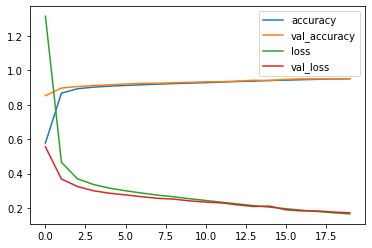

In [696]:
plt.plot(history['accuracy'], label='accuracy'), 
plt.plot(history['val_accuracy'], label='val_accuracy') 
plt.plot(history['loss'], label='loss'),
plt.plot(history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

### 5/6. Improve Test result to > 98%

Define model.

In [697]:
better_model = Sequential([
    Dense(520, input_shape=(784,)),
    Activation('relu'),
    Dense(520),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])
optimizer = Adam(learning_rate=0.001, decay=0.0015)
better_model.summary()

Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_474 (Dense)            (None, 520)               408200    
_________________________________________________________________
activation_474 (Activation)  (None, 520)               0         
_________________________________________________________________
dense_475 (Dense)            (None, 520)               270920    
_________________________________________________________________
activation_475 (Activation)  (None, 520)               0         
_________________________________________________________________
dense_476 (Dense)            (None, 10)                5210      
_________________________________________________________________
activation_476 (Activation)  (None, 10)                0         
Total params: 684,330
Trainable params: 684,330
Non-trainable params: 0
______________________________________________

Train model.

In [698]:
better_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = better_model.fit(x_train, one_hot_y_train, epochs=5, batch_size=64, validation_split=0.2).history

Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 0.2076 - accuracy: 0.9388 - val_loss: 0.1030 - val_accuracy: 0.9681
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0706 - accuracy: 0.9785 - val_loss: 0.0838 - val_accuracy: 0.9744
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0774 - val_accuracy: 0.9778
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0266 - accuracy: 0.9931 - val_loss: 0.0746 - val_accuracy: 0.9778
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0169 - accuracy: 0.9961 - val_loss: 0.0725 - val_accuracy: 0.9793


Plot training progress.

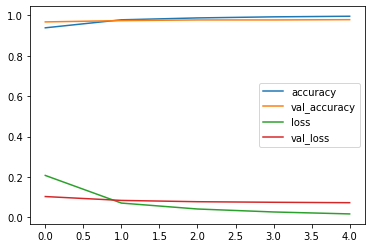

In [699]:
plt.plot(history['accuracy'], label='accuracy'), 
plt.plot(history['val_accuracy'], label='val_accuracy') 
plt.plot(history['loss'], label='loss'),
plt.plot(history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

Evaluate model.

In [700]:
better_model.evaluate(x_test, one_hot_y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0590 - accuracy: 0.9811


[0.05896598473191261, 0.9811000227928162]